In [1]:
import pandas as pd

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input,MaxPooling2D,Convolution2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.
c:\users\monkey d. appl3\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\monkey d. appl3\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\monkey d. appl3\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

In [3]:
x = pd.read_csv("fashion-mnist_train.csv")

In [4]:
x = np.array(x)

In [5]:
X = x[:,1:]
Y = x[:,0]
X = X / 255.0
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [6]:
np.unique(Y,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [7]:
x_train = X.reshape((-1,28,28,1)) # reshaped this one
y_train = np_utils.to_categorical(Y) # one hot metrics

print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [8]:
!pip install matplotlib

In [9]:
import matplotlib.pyplot as plt

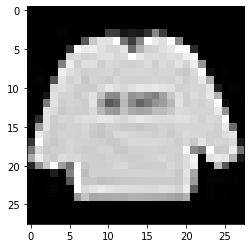

In [10]:
for i in range(1):
    plt.imshow(x_train[i].reshape(28,28),cmap = 'gray')
    plt.show()

In [11]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Convolution2D(8,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      


In [12]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [13]:
hist = model.fit(x_train,y_train,epochs = 10,shuffle = True,batch_size = 256,validation_split = 0.20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.8377 - acc: 0.6979 - val_loss: 0.5486 - val_acc: 0.8103
Epoch 2/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.4628 - acc: 0.8348 - val_loss: 0.4648 - val_acc: 0.8413
Epoch 3/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.3846 - acc: 0.8636 - val_loss: 0.4200 - val_acc: 0.8615
Epoch 4/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.3469 - acc: 0.8763 - val_loss: 0.3527 - val_acc: 0.8855
Epoch 5/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.3190 - acc: 0.8877 - val_loss: 0.3379 - val_acc: 0.8813
Epoch 6/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.3015 - acc: 0.8920 - val_loss: 0.3148 - val_acc: 0.8931
Epoch 7/10
48000/48000 [==========

In [19]:
test = pd.read_csv("fashion-mnist_test.csv")
test = np.array(test)
# loading test data and preprocessing the test data and test data contains 10000 samples with their labels

x_test = test[:,1:]
y_test = test[:,0]
x_test = x_test / 255.0

# reshaping of testing data
x_test = x_test.reshape(-1,28,28,1)
y_test = np_utils.to_categorical(y_test)
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 301us/step


[0.2770164114952087, 0.9041]